In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os
codebase = '../'
sys.path.append(codebase)
from dataloaders.visual_genome import VG
import numpy as np
# np.set_printoptions(threshold=np.inf, linewidth=200, precision=2, suppress=True)
# np.set_printoptions(threshold=np.inf, precision=2, suppress=True)

from collections import Counter
from tqdm import tqdm

In [3]:
train_data=VG(mode='train', filter_duplicate_rels=False, num_val_im=5000)
# mat = np.zeros((
#     train_data.num_classes,
#     train_data.num_classes,
# ), dtype=np.int64)
# sum_obj_pict = np.zeros(train_data.num_classes, dtype=np.int64)

In [3]:
len(train_data)

56224

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([10,  0,  5,  7,  8])

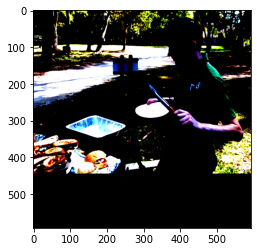

In [6]:
example_0 = train_data[0]
img = example_0['img']
gt_relations = example_0['gt_relations']
gt_boxes = example_0['gt_boxes']
gt_classes = example_0['gt_classes']
gt_boxes.shape
import matplotlib.pyplot as plt
img.shape
img.permute((1, 2, 0)).shape
plt.imshow(img.permute((1, 2, 0)));
train_data.ind_to_predicates[31]
gt_classes
train_data.ind_to_classes[gt_classes[12]], train_data.ind_to_classes[gt_classes[10]], train_data.ind_to_predicates[31]
gt_relations_0 = example_0['gt_relations']
gt_relations_0.shape
gt_relations_0[:, 0]
gt_relations_0[:, 1]

In [7]:
gt_relations_0

array([[12, 10, 31],
       [ 1,  0, 20],
       [13,  5, 20],
       [13,  7, 21],
       [11,  8, 50]])

In [8]:
gt_classes

array([  3,  20,  49,  49,  57,  58,  59,  97,  99, 105, 111, 115,  77,
        78])

In [9]:
example_0.keys()

dict_keys(['img', 'img_size', 'gt_boxes', 'gt_classes', 'gt_relations', 'scale', 'index', 'flipped', 'fn'])

In [10]:
train_data.ind_to_classes[gt_classes[1]], train_data.ind_to_classes[gt_classes[0]], train_data.ind_to_predicates[20]


('boy', 'arm', 'has')

In [ ]:
# gt_relations': array([[12, 10, 31], # gt_box[12] (gt_classes[12]), gt_box[10] (gt_classes[10]), ind_to_predicates[31]
#         [ 1,  0, 20],
#         [13,  5, 20],
#         [13,  7, 21],
#         [11,  8, 50]]),

In [ ]:
# TODO: maybe p_obj should be a matrix and then in eeach iteration we update 
# count_obj[gt_classes_np[objs], :] +=1

In [ ]:
# p_subj_given_obj = p_subj_and_obj / p_obj

In [15]:
num_classes = train_data.num_classes
count_subj_obj = np.zeros((num_classes, num_classes), dtype=np.int64)
count_subj = np.zeros(num_classes, dtype=np.int64)
count_obj = np.zeros(num_classes, dtype=np.int64)

num_predicates = train_data.num_predicates
count_subj_pred = np.zeros((num_classes, num_predicates), dtype=np.int64)
count_obj_pred = np.zeros((num_classes, num_predicates), dtype=np.int64)
count_pred = np.zeros(num_predicates, dtype=np.int64)

count_entities_preds = np.zeros((num_classes, num_predicates), dtype=np.int64)

num_relations = 0
num_preds = 0
for idx, train_sample in enumerate(tqdm(train_data)):
    gt_classes = train_sample['gt_classes']
    gt_relations = train_sample['gt_relations']
    gt_classes_np = np.array(gt_classes)
#     subj, obj, rel = gt_rels
    subjs = gt_relations[:, 0]
    objs = gt_relations[:, 1]
    indices_preds = gt_relations[:, 2]
    
    indices_subjs = gt_classes_np[subjs]
    indices_objs = gt_classes_np[objs]
    
#     import pdb; pdb.set_trace()
#     indices_entities = indices_subjs + indices_objs # but sometimes add to above 151.
    indices_entities = np.concatenate([indices_subjs, indices_objs]) # but sometimes add to above 151.
    
    num_relations += len(gt_relations)
    np.add.at(count_subj_obj, (indices_subjs, indices_objs), 1)
    np.add.at(count_subj, indices_subjs, 1)
    np.add.at(count_obj, indices_objs, 1)
    np.add.at(count_pred, indices_preds, 1)
    
    num_preds += len(indices_preds)
    
#     np.add.at(count_entities_preds, (indices_entities, indices_preds), 1) # can I do double? Since this is count, yet.
    

#     count_subj_obj[gt_classes_np[subjs], gt_classes_np[objs]] += 1
#     count_subj[gt_classes_np[subjs]] += 1 # this skips duplicate counting so 78 78 only get counted once.
#     count_obj[gt_classes_np[objs]] += 1
    
#     import pdb; pdb.set_trace()
    
    
#     count_subj[gt_classes[subjs]] += 1
#     count_subj[gt_classes_np[subjs]] += 1
#     count_obj[gt_classes_np[objs]] += 1
    
#     import pdb; pdb.set_trace()
    
#     gt_classes_list = list(set(gt_classes)) 
#     for i in gt_classes_list:
#         sum_obj_pict[i] += 1
#     inds = np.transpose(np.nonzero(1 - np.eye(len(gt_classes_list), dtype=np.int64)))
#     for (i, j) in inds:

#         # Thank @ystluffy for finding that it is 
#         # more accurate to replace ```mat[gt_classes[i], gt_classes[j]] += 1``` with mat[gt_classes_list[i], gt_classes_list[j]] +=1.
#         # However, since the checkpoints we released were trained by the old code, 
#         # if you want to use our checkpoint, you still need to use the old code ```mat[gt_classes[i], gt_classes[j]] += 1```.

#         # mat[gt_classes_list[i], gt_classes_list[j]] +=1 # If you want to train models by yourself, please uncomment this code because it is more accurate.
#         mat[gt_classes[i], gt_classes[j]] += 1 # If you want to use our checkpoint, you still need to use this code. If you want to train models by yourself, please comment it.
#     for key, value in dict(Counter(gt_classes)).items():
#         if value >= 2:
#             mat[key, key] += 1

# sum_obj_pict[0] = 1 # because idx 0 means background, and the value is zero, divide zero will occurr an error, so add 1.

# obj_cooccurrence_matrix = mat / np.expand_dims(sum_obj_pict, axis=1)

  8%|████████████████▌                                                                                                                                                                                   | 4740/56224 [02:27<26:36, 32.24it/s]


KeyboardInterrupt: 

In [ ]:
# pred_cov

In [ ]:
num_relations

In [ ]:
count_subj_obj[:, 1].sum()

In [ ]:
count_obj[1]

In [ ]:
p_subj_given_obj = count_subj_obj/count_obj[np.newaxis, :]
p_subj_given_obj_nan_to_0 = np.nan_to_num(p_subj_given_obj)

p_obj_given_subj = count_subj_obj/count_subj[:, np.newaxis]
p_obj_given_subj_nan_to_0 = np.nan_to_num(p_obj_given_subj)


In [ ]:
p_subj_obj = count_subj_obj/count_subj_obj.sum()
p_subj = count_subj/count_subj.sum()
p_obj = count_obj/count_obj.sum()


In [ ]:
p_subj_obj.sum()

In [ ]:
from utils import save_obj, load_obj

# save_obj(count_subj_obj, 'count_subj_obj')
# save_obj(count_subj, 'count_subj')
# save_obj(count_obj, 'count_obj')

# count_subj_obj = load_obj('count_subj_obj')
# count_subj = load_obj('count_subj')
# count_obj = load_obj('count_obj')


In [ ]:
count_subj_obj

# I did Conditional Probability Wrong?

In [ ]:
p_subj_given_obj = p_subj_obj/p_obj[:, np.newaxis] # divide a row, not a column
# p_subj_given_obj = np.divide(p_subj_obj, p_obj, out=np.zeros_like(p_subj_obj), where=p_obj!=0)
p_subj_given_obj_nan_to_0 = np.nan_to_num(p_subj_given_obj)

p_obj_given_subj = p_subj_obj/p_subj[np.newaxis, :] # divide a row, not a column
# p_subj_given_obj = np.divide(p_subj_obj, p_obj, out=np.zeros_like(p_subj_obj), where=p_obj!=0)
p_obj_given_subj_nan_to_0 = np.nan_to_num(p_obj_given_subj)


In [ ]:
# mat = np.zeros((
#     train_data.num_classes,
#     train_data.num_classes,
# ), dtype=np.int64)
# sum_obj_pict = np.zeros(train_data.num_classes, dtype=np.int64)

# for ex_ind in tqdm(range(len(train_data))):
#     gt_classes = train_data.gt_classes[ex_ind].copy()
# #     import pdb; pdb.set_trace()
#     gt_classes_list = list(set(gt_classes)) 
#     for i in gt_classes_list:
#         sum_obj_pict[i] += 1
#     inds = np.transpose(np.nonzero(1 - np.eye(len(gt_classes_list), dtype=np.int64)))
#     for (i, j) in inds:

#         # Thank @ystluffy for finding that it is 
#         # more accurate to replace ```mat[gt_classes[i], gt_classes[j]] += 1``` with mat[gt_classes_list[i], gt_classes_list[j]] +=1.
#         # However, since the checkpoints we released were trained by the old code, 
#         # if you want to use our checkpoint, you still need to use the old code ```mat[gt_classes[i], gt_classes[j]] += 1```.

#         # mat[gt_classes_list[i], gt_classes_list[j]] +=1 # If you want to train models by yourself, please uncomment this code because it is more accurate.
#         mat[gt_classes[i], gt_classes[j]] += 1 # If you want to use our checkpoint, you still need to use this code. If you want to train models by yourself, please comment it.
#     for key, value in dict(Counter(gt_classes)).items():
#         if value >= 2:
#             mat[key, key] += 1

# sum_obj_pict[0] = 1 # because idx 0 means background, and the value is zero, divide zero will occurr an error, so add 1.

# obj_cooccurrence_matrix = mat / np.expand_dims(sum_obj_pict, axis=1)

In [ ]:
np.linalg.norm(obj_cooccurrence_matrix)

# Read in Zareian's stat matrices

In [97]:
import pickle
all_edges_fname = '../graphs/005/all_edges.pkl'
with open(all_edges_fname, 'rb') as f:
    all_edges = pickle.load(f)
    
print({k: v.shape for k, v in all_edges.items()})
# # Reverse engineer (really retrieving) the component graphs from all_edges
# edge_dict = {}
# edge_dict['edges_ent2ent'] = np.concatenate((
#     edge_dict_conceptnet['conceptnet_ent2ent'],
#     edge_dict_stat['p_obj_given_subj'].T[np.newaxis, :, :],
#     edge_dict_stat['p_subj_given_obj'].T[np.newaxis, :, :],
#     edge_dict_stat['noun_cov'].T[np.newaxis, :, :],
#     edges_wordnet[np.newaxis, :, :],
# ))
# edge_dict['edges_pred2pred'] = np.concatenate((
#     edge_dict_conceptnet['conceptnet_pred2pred'],
#     edge_dict_stat['pred_cov'].T[np.newaxis, :, :],
# ))
# edge_dict['edges_ent2pred'] = np.concatenate((
#     edge_dict_conceptnet['conceptnet_ent2pred'],
#     edge_dict_stat['p_subj_given_pred'].T[np.newaxis, :, :],
#     edge_dict_stat['p_obj_given_pred'].T[np.newaxis, :, :],
# ))
# edge_dict['edges_pred2ent'] = np.concatenate((
#     edge_dict_conceptnet['conceptnet_pred2ent'],
#     edge_dict_stat['p_pred_given_subj'].T[np.newaxis, :, :],
#     edge_dict_stat['p_pred_given_obj'].T[np.newaxis, :, :],
# ))


edges_ent2ent = all_edges['edges_ent2ent']
print('edges_ent2ent.shape =', edges_ent2ent.shape)
p_obj_given_subj_zareian = edges_ent2ent[5, :, :].T
p_subj_given_obj_zareian = edges_ent2ent[6, :, :].T
noun_cov_zareian = edges_ent2ent[7, :, :].T
edges_wordnet_zareian = edges_ent2ent[8, :, :]


edges_pred2pred = all_edges['edges_pred2pred']
print('edges_pred2pred.shape =', edges_pred2pred.shape)
pred_cov_zareian = edges_pred2pred[3, : :].T

edges_ent2pred = all_edges['edges_ent2pred']
print('edges_ent2pred.shape =', edges_ent2pred.shape)
p_subj_given_pred_zareian = edges_ent2pred[1, :, :].T
p_obj_given_pred_zareian = edges_ent2pred[2, :, :].T

edges_pred2ent = all_edges['edges_pred2ent']
print('edges_pred2ent.shape =', edges_pred2ent.shape)
p_pred_given_subj_zareian = edges_pred2ent[1, :, :].T
p_pred_given_obj_zareian = edges_pred2ent[2, :, :].T



{'edges_ent2ent': (9, 151, 151), 'edges_pred2pred': (4, 51, 51), 'edges_ent2pred': (3, 151, 51), 'edges_pred2ent': (3, 51, 151)}
edges_ent2ent.shape = (9, 151, 151)
edges_pred2pred.shape = (4, 51, 51)
edges_ent2pred.shape = (3, 151, 51)
edges_pred2ent.shape = (3, 51, 151)


In [98]:
def add_0_for_new_labels_array(labels_original, original_array, to_labels_or_predicates):
    '''Args:
        labels_original: an alphabetically sorted unique list that is typically
                ind_to_classes or ind_to_predicates. Should look like ['_background_', 'apple', 'boy', 'shirt', ...].
        original_array: values with indices corresponding to labels_original.
        to_labels_or_predicates: an alphabetically sorted unique list 
    '''
    # assume it's all alphabetically sorted
#     output = np.zeros(to_labels_or_predicates)
    dict_original = {label: value for label, value in zip(labels_original, original_array)} # output sorted
    
#     to_labels_or_predicates_label_to_order = {label: idx for idx, label enumerate(to_labels_or_predicates)}
    
    
#     ind_old_to_new = [to_labels_or_predicates_label_to_order[label] for label in labels_original]# a flat array with 151 elements.
#     import pdb; pdb.set_trace()
    
    return [dict_original.get(label, 0) for label in sorted(to_labels_or_predicates)]

# def add_0_for_new_labels_matrix_square(labels_original, matrix_old, labels_new):
#     '''
#     Args:
#         labels_original: an alphabetically sorted unique list that is typically
#                 ind_to_classes or ind_to_predicates. Should look like ['_background_', 'apple', 'boy', 'shirt', ...].
#         matrix_old: values with indices corresponding to labels_original.
#         labels_new: an alphabetically sorted unique list 
#     '''
#     if matrix_old.shape == len(labels_new):
#         return matrix_old
    
#     matrix_new = np.zeros((len(labels_new), len(labels_new)), dtype=matrix_old.dtype)

#     label2order_new = {label: idx for idx, label in enumerate(labels_new)}
#     label2order_old = {label: idx for idx, label in enumerate(labels_original)}
    
#     ind_old_to_new = [label2order_new[label] for label in labels_original]# a flat array with 151 elements.
#     # assume it's all alphabetically sorted
    
#     ind_new_to_old = [label2order_old.get(label_new, -1) for label_new in labels_new]
    
#     ind_old_in_new = np.where(np.array(ind_new_to_old) != -1)
#     ind_old_in_new_meshed = np.meshgrid(ind_old_in_new, ind_old_in_new)
#     matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]
# #     import pdb; pdb.set_trace()
#     return matrix_new
    

def add_0_for_new_labels_matrix_rect(lists_original, matrix_old, lists_new):
    '''
    Args:
        lists_original: could be ordered as (labels_original, preds_original) or (preds_original, labels_original)
                an alphabetically sorted unique list that is typically
                ind_to_classes or ind_to_predicates. Should look like ['_background_', 'apple', 'boy', 'shirt', ...].
        matrix_old: values with indices corresponding to labels_original.
        lists_new: could be ordered as (labels_original, preds_original) or (preds_original, labels_original)
                an alphabetically sorted unique list that is typically
                ind_to_classes or ind_to_predicates. Should look like ['_background_', 'apple', 'boy', 'shirt', ...].
    '''
    len_lists_original = len(lists_original)
    len_lists_new = len(lists_new)
    if isinstance(lists_original, tuple):
        assert isinstance(lists_new, tuple)
        assert len_lists_original == len_lists_new == 2
        labels_original, preds_original = lists_original
        labels_new, preds_new = lists_new
        assert matrix_old.shape == (len(labels_original), len(preds_original))
    else:
        assert not isinstance(lists_new, tuple)
        labels_original, preds_original = lists_original, lists_original
        labels_new, preds_new = lists_new, lists_new

    if len(labels_original) == len(labels_new) and len(preds_original) == len(preds_new):
        return matrix_old
    
    matrix_new = np.zeros((len(labels_new), len(preds_new)), dtype=matrix_old.dtype)

    # Labels
    label2order_new_labels = {label: idx for idx, label in enumerate(labels_new)}
    ind_old_in_new_labels = [label2order_new_labels[label] for label in labels_original]
    
    label2order_new_preds = {label: idx for idx, label in enumerate(preds_new)}
    ind_old_in_new_preds = [label2order_new_preds[preds] for preds in preds_original]
    
    ind_old_in_new_meshed = np.meshgrid(ind_old_in_new_labels, ind_old_in_new_preds, indexing='ij')
#     import pdb; pdb.set_trace()
    matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]
    
    return matrix_new

In [6]:
import json
with open('VG-SGG-dicts_combined_176_20211107.json', 'r') as fin:
    scene_graph_meta = json.load(fin)
new_labels2order = scene_graph_meta['label_to_idx'].copy()
labels_new = sorted(list(new_labels2order.keys()) + ['__background__'])
new_preds2order = scene_graph_meta['predicate_to_idx'].copy()
preds_new = sorted(list(new_preds2order.keys()) + ['__background__'])


In [7]:
ind_to_classes = train_data.ind_to_classes
ind_to_predicates = train_data.ind_to_predicates

In [99]:
# p_obj_given_subj_177 = add_0_for_new_labels_matrix_square(ind_to_classes, p_obj_given_subj_zareian, labels_new)
p_obj_given_subj_177 = add_0_for_new_labels_matrix_rect(ind_to_classes, p_obj_given_subj_zareian, labels_new)

print(p_obj_given_subj_177.sum()) # 92.9435580075201
print(p_obj_given_subj_zareian.sum()) # 92.9435580075201

print(np.linalg.norm(p_obj_given_subj_177)) # 4.604291056925109
print(np.linalg.norm(p_obj_given_subj_zareian)) # 4.604291056925109

92.9435580075201
92.9435580075201
4.604291056925109
4.604291056925109


/var/folders/xy/tbq6kycs4d36d52195rff0bc0000gn/T/ipykernel_9664/1096393127.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]


# 2. p_subj_given_obj (inexact numbers)?

In [100]:
# p_subj_given_obj_177 = add_0_for_new_labels_matrix_square(ind_to_classes, p_subj_given_obj_zareian, labels_new)
p_subj_given_obj_177 = add_0_for_new_labels_matrix_rect(ind_to_classes, p_subj_given_obj_zareian, labels_new)

print(p_subj_given_obj_177.sum()) # 91.79537433793304
print(p_subj_given_obj_zareian.sum()) # 91.79537433793303

print(np.linalg.norm(p_subj_given_obj_177)) # 4.465697110426099
print(np.linalg.norm(p_subj_given_obj_zareian)) # 4.465697110426099

91.79537433793304
91.79537433793303
4.465697110426099
4.465697110426099


/var/folders/xy/tbq6kycs4d36d52195rff0bc0000gn/T/ipykernel_9664/1096393127.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]


# 3. noun_cov

In [101]:
noun_cov_zareian.shape

(151, 151)

In [102]:
noun_cov_177 = add_0_for_new_labels_matrix_rect(ind_to_classes, noun_cov_zareian, labels_new)
# noun_cov_177 = add_0_for_new_labels_matrix_square(ind_to_classes, noun_cov_zareian, labels_new)
# noun_cov_177 = add_0_for_new_labels_matrix_rect((ind_to_classes, ind_to_classes), noun_cov_zareian, (labels_new, labels_new))

print(noun_cov_177.sum()) # 92.1189228863872
print(noun_cov_zareian.sum()) # 92.11892288638718

print(np.linalg.norm(noun_cov_177)) # 4.559256391194923
print(np.linalg.norm(noun_cov_zareian)) # 4.559256391194923

92.1189228863872
92.11892288638718
4.559256391194923
4.559256391194923


/var/folders/xy/tbq6kycs4d36d52195rff0bc0000gn/T/ipykernel_9664/1096393127.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]


# 4. pred_cov just use existing

In [103]:
pred_cov_zareian.shape

(51, 51)

In [104]:
# pred_cov_177 = add_0_for_new_labels_matrix_square(ind_to_predicates, pred_cov_zareian, preds_new)
pred_cov_177 = add_0_for_new_labels_matrix_rect(ind_to_predicates, pred_cov_zareian, preds_new)

print(pred_cov_177.sum()) # 17.14979418056324
print(pred_cov_zareian.sum()) # 17.14979418056324

print(np.linalg.norm(pred_cov_177)) # 2.283048635386229
print(np.linalg.norm(pred_cov_zareian)) # 2.283048635386229

17.14979418056324
17.14979418056324
2.283048635386229
2.283048635386229


# 5. p_subj_given_pred

In [111]:
# p_subj_given_pred_zareian_177 = add_0_for_new_labels_matrix_rect((ind_to_classes, ind_to_predicates), p_subj_given_pred_zareian, (labels_new, preds_new))
p_subj_given_pred_177 = add_0_for_new_labels_matrix_rect((ind_to_predicates, ind_to_classes), p_subj_given_pred_zareian, (preds_new, labels_new))


print(p_subj_given_pred_177.sum()) # 30.024907542692837
print(p_subj_given_pred_zareian.sum()) # 30.02490754269284

print(np.linalg.norm(p_subj_given_pred_177)) # 2.5661188439487117
print(np.linalg.norm(p_subj_given_pred_zareian)) # 2.5661188439487117

30.024907542692837
30.02490754269284
2.5661188439487117
2.5661188439487117


/var/folders/xy/tbq6kycs4d36d52195rff0bc0000gn/T/ipykernel_9664/1096393127.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]


# 6. p_obj_given_pred

In [113]:
p_obj_given_pred_177 = add_0_for_new_labels_matrix_rect((ind_to_predicates, ind_to_classes), p_obj_given_pred_zareian, (preds_new, labels_new))


print(p_obj_given_pred_177.sum()) # 28.131598869874033 => 28.131598869874036
print(p_obj_given_pred_zareian.sum()) # 28.131598869874033

print(np.linalg.norm(p_obj_given_pred_177)) # 2.6060575923744858
print(np.linalg.norm(p_obj_given_pred_zareian)) # 2.6060575923744858

28.131598869874036
28.131598869874033
2.6060575923744858
2.6060575923744858


/var/folders/xy/tbq6kycs4d36d52195rff0bc0000gn/T/ipykernel_9664/1096393127.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]


# 7. p_pred_given_subj

In [114]:
p_pred_given_subj_177 = add_0_for_new_labels_matrix_rect((ind_to_classes, ind_to_predicates), p_pred_given_subj_zareian, (labels_new, preds_new))


print(p_pred_given_subj_177.sum()) # 56.951360458309104
print(p_pred_given_subj_zareian.sum()) # 56.951360458309104

print(np.linalg.norm(p_pred_given_subj_177)) # 3.6523117946047545 => 3.652311794604755
print(np.linalg.norm(p_pred_given_subj_zareian)) # 3.652311794604755

56.951360458309104
56.951360458309104
3.652311794604755
3.652311794604755


/var/folders/xy/tbq6kycs4d36d52195rff0bc0000gn/T/ipykernel_9664/1096393127.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]


# 8. p_pred_given_obj

In [115]:
p_pred_given_obj_177 = add_0_for_new_labels_matrix_rect((ind_to_classes, ind_to_predicates), p_pred_given_obj_zareian, (labels_new, preds_new))


print(p_pred_given_obj_177.sum()) # 67.5168830021508
print(p_pred_given_obj_zareian.sum()) # 67.51688300215082

print(np.linalg.norm(p_pred_given_obj_177)) # 4.508355818863685
print(np.linalg.norm(p_pred_given_obj_zareian)) # 4.508355818863685

67.5168830021508
67.51688300215082
4.508355818863685
4.508355818863685


/var/folders/xy/tbq6kycs4d36d52195rff0bc0000gn/T/ipykernel_9664/1096393127.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrix_new[ind_old_in_new_meshed] = matrix_old[:, :]


# 9. edges_wordnet

In [94]:
from utils import load_obj

edges_wordnet_177 = load_obj('wordnet_e2e_graph')

print(edges_wordnet_177.shape)
print(edges_wordnet_177.sum()) # 1528.0
print(edges_wordnet_zareian.sum()) # 1528.0

print(np.linalg.norm(edges_wordnet_177)) # 39.08964
print(np.linalg.norm(edges_wordnet_zareian)) # 39.08964057138413

(177, 177)
2356.0
1528.0
48.538643
39.08964057138413


# 10. THE REMAKE WOOOOHOOOOO BUT DO I HAVE TO TRANSPOSE ABOVE?

In [88]:
model_fname = 'edge_dict_conceptnet_plus_wikidata_177_20211107'
edge_dict_conceptnet = load_obj(model_fname)
print({k: v.shape for k, v in edge_dict_conceptnet.items()})

{'edges_ent2ent': (5, 177, 177), 'edges_pred2pred': (3, 51, 51), 'edges_ent2pred': (1, 177, 51), 'edges_pred2ent': (1, 51, 177)}


In [89]:
p_obj_given_subj_177.shape

(177, 177)

In [90]:
p_subj_given_obj_177.shape

(177, 177)

In [91]:
noun_cov_177.shape

(177, 177)

In [92]:
edges_wordnet_177.shape

(151, 151)

In [116]:
# import pickle
# all_edges_fname = '../graphs/005/all_edges.pkl'
# with open(all_edges_fname, 'rb') as f:
#     all_edges = pickle.load(f)
    
# print({k: v.shape for k, v in all_edges.items()})
# Reverse engineer (really retrieving) the component graphs from all_edges

edge_dict = {}
edge_dict['edges_ent2ent'] = np.concatenate((
    edge_dict_conceptnet['edges_ent2ent'],
    p_obj_given_subj_177.T[np.newaxis, :, :],
    p_subj_given_obj_177.T[np.newaxis, :, :],
    noun_cov_177.T[np.newaxis, :, :],
    edges_wordnet_177[np.newaxis, :, :],
))
edge_dict['edges_pred2pred'] = np.concatenate((
    edge_dict_conceptnet['edges_pred2pred'],
    pred_cov_177.T[np.newaxis, :, :],
))
edge_dict['edges_ent2pred'] = np.concatenate((
    edge_dict_conceptnet['edges_ent2pred'],
    p_subj_given_pred_177.T[np.newaxis, :, :],
    p_obj_given_pred_177.T[np.newaxis, :, :],
))
edge_dict['edges_pred2ent'] = np.concatenate((
    edge_dict_conceptnet['edges_pred2ent'],
    p_pred_given_subj_177.T[np.newaxis, :, :],
    p_pred_given_obj_177.T[np.newaxis, :, :],
))


# 11. What is emb_txt.pkl?

In [123]:
emb_txt = load_obj('../emb_mtx')

In [126]:
emb_txt[0].shape

(151, 300)

In [127]:
emb_txt[1].shape

(51, 300)

In [128]:
class_emb = emb_txt[0]

In [131]:
list(class_emb[1, :])

[0.6211,
 -0.39874,
 0.14321,
 0.28194,
 0.0038609,
 0.1898,
 -0.28864,
 0.17805,
 -0.035572,
 1.4961,
 -0.13706,
 -0.14196,
 -0.026383,
 0.72826,
 -0.35226,
 -0.37511,
 -0.27416,
 1.4705,
 0.31603,
 0.14479,
 0.19294,
 0.42574,
 0.091374,
 -0.17488,
 -0.091571,
 -0.20781,
 -0.22683,
 -0.47929,
 0.12863,
 0.10886,
 0.013498,
 0.061848,
 -0.21688,
 0.72678,
 0.080694,
 -0.011434,
 -0.11786,
 -0.021758,
 -0.36409,
 -0.081989,
 0.58173,
 -0.075399,
 0.016165,
 0.39535,
 0.20805,
 0.0839,
 -0.79497,
 -0.41138,
 0.62382,
 0.71265,
 -0.13253,
 -0.17699,
 0.019825,
 0.36654,
 -0.81999,
 -0.15933,
 0.67562,
 -0.25676,
 0.47549,
 -0.34246,
 0.3277,
 0.19302,
 0.092526,
 0.19311,
 0.16537,
 0.06416,
 -0.049696,
 0.21859,
 -0.51072,
 0.046594,
 -0.13256,
 -0.14836,
 0.0091441,
 0.19261,
 -0.046291,
 -0.18944,
 -0.070879,
 0.33101,
 -0.0094327,
 0.69291,
 0.40625,
 -0.4401,
 0.17144,
 0.084609,
 0.12827,
 -0.10758,
 0.61646,
 0.59103,
 -0.10727,
 0.083691,
 0.01804,
 0.52581,
 -0.44348,
 -0.61583,

In [121]:
# from utils import save_obj
# save_obj(edge_dict, 'edge_dict_all_plus_wikidata_177_20220208')

In [ ]:
# """
# Generate knowledge matrices
# """

# import numpy as np
# from lib.fpn.box_utils import bbox_overlaps
# from dataloaders.visual_genome import VG
# # from lib.fpn.box_intersections_cpu.bbox import bbox_overlaps
# from lib.pytorch_misc import nonintersecting_2d_inds
# from collections import Counter

In [ ]:
# def get_obj_cooccurrence_mat(train_data=VG(mode='train', filter_duplicate_rels=False, num_val_im=5000)):
#     """
#     Get the object cooccurrence matrix, where the (i, j) means P(o_j | o_i)
#     :param train_data:
#     """


#     mat = np.zeros((
#         train_data.num_classes,
#         train_data.num_classes,
#     ), dtype=np.int64)
#     sum_obj_pict = np.zeros(train_data.num_classes, dtype=np.int64)

#     for ex_ind in range(len(train_data)):
#         gt_classes = train_data.gt_classes[ex_ind].copy()
#         gt_classes_list = list(set(gt_classes))
#         for i in gt_classes_list:
#             sum_obj_pict[i] += 1
#         inds = np.transpose(np.nonzero(1 - np.eye(len(gt_classes_list), dtype=np.int64)))
#         for (i, j) in inds:

#             # Thank @ystluffy for finding that it is
#             # more accurate to replace ```mat[gt_classes[i], gt_classes[j]] += 1``` with mat[gt_classes_list[i], gt_classes_list[j]] +=1.
#             # However, since the checkpoints we released were trained by the old code,
#             # if you want to use our checkpoint, you still need to use the old code ```mat[gt_classes[i], gt_classes[j]] += 1```.

#             # mat[gt_classes_list[i], gt_classes_list[j]] +=1 # If you want to train models by yourself, please uncomment this code because it is more accurate.
#             mat[gt_classes[i], gt_classes[j]] += 1 # If you want to use our checkpoint, you still need to use this code. If you want to train models by yourself, please comment it.
#         for key, value in dict(Counter(gt_classes)).items():
#             if value >= 2:
#                 mat[key, key] += 1

#     sum_obj_pict[0] = 1 # because idx 0 means background, and the value is zero, divide zero will occurr an error, so add 1.

#     obj_cooccurrence_matrix = mat / np.expand_dims(sum_obj_pict, axis=1)

#     return obj_cooccurrence_matrix


# def get_counts(train_data=VG(mode='train', filter_duplicate_rels=False, num_val_im=5000), must_overlap=True):
#     """
#     Get counts of all of the relations. Used for modeling directly P(rel | o1, o2)
#     :param train_data:
#     :param must_overlap:
#     :return:
#     """
#     fg_matrix = np.zeros((
#         train_data.num_classes,
#         train_data.num_classes,
#         train_data.num_predicates,
#     ), dtype=np.int64)

#     bg_matrix = np.zeros((
#         train_data.num_classes,
#         train_data.num_classes,
#     ), dtype=np.int64)

#     for ex_ind in range(len(train_data)):
#         gt_classes = train_data.gt_classes[ex_ind].copy()
#         gt_relations = train_data.relationships[ex_ind].copy()
#         gt_boxes = train_data.gt_boxes[ex_ind].copy()

#         # For the foreground, we'll just look at everything
#         o1o2 = gt_classes[gt_relations[:, :2]]
#         for (o1, o2), gtr in zip(o1o2, gt_relations[:,2]):
#             fg_matrix[o1, o2, gtr] += 1

#         # For the background, get all of the things that overlap.
#         o1o2_total = gt_classes[np.array(
#             box_filter(gt_boxes, must_overlap=must_overlap), dtype=int)]
#         for (o1, o2) in o1o2_total:
#             bg_matrix[o1, o2] += 1

#     return fg_matrix, bg_matrix


# def box_filter(boxes, must_overlap=False):
#     """ Only include boxes that overlap as possible relations.
#     If no overlapping boxes, use all of them."""
#     n_cands = boxes.shape[0]

#     overlaps = bbox_overlaps(boxes.astype(np.float), boxes.astype(np.float)) > 0
#     np.fill_diagonal(overlaps, 0)

#     all_possib = np.ones_like(overlaps, dtype=np.bool)
#     np.fill_diagonal(all_possib, 0)

#     if must_overlap:
#         possible_boxes = np.column_stack(np.where(overlaps))

#         if possible_boxes.size == 0:
#             possible_boxes = np.column_stack(np.where(all_possib))
#     else:
#         possible_boxes = np.column_stack(np.where(all_possib))
#     return possible_boxes

In [ ]:
obj_matrix = get_obj_cooccurrence_mat()
np.save('prior_matrices/obj_matrix', obj_matrix)

fg_matrix, bg_matrix = get_counts(must_overlap=True)
bg_matrix += 1
fg_matrix[:, :, 0] = bg_matrix
rel_matrix = fg_matrix / fg_matrix.sum(2)[:, :, None]
np.save('prior_matrices/rel_matrix', rel_matrix)